# Data insights

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
pd.set_option("display.max_roWs", 30)
pd.set_option("display.max_columns", None)

## Company Data

### Log Data

In [4]:
log_al_suba = pd.read_csv('data/Masivo_capital_1_conductor_logueado/Informe Tiempo Conductor Logueado_Alimentacion_102 Suba Oriental_202104.csv', sep=';')
log_al_ken = pd.read_csv('data/Masivo_capital_1_conductor_logueado/Informe Tiempo Conductor Logueado_Alimentacion_112 Kennedy_202104.csv', sep=';')
log_zn_suba = pd.read_csv('data/Masivo_capital_1_conductor_logueado/Informe Tiempo Conductor Logueado_Zonal_102 Suba Oriental_202104.csv', sep=';')
log_zn_ken = pd.read_csv('data/Masivo_capital_1_conductor_logueado/Informe Tiempo Conductor Logueado_Zonal_112 Kennedy_202104.csv', sep=';')

### Activity Data

In [2]:
number = 20210401
dates_al_suba = pd.read_csv('data/Masivo_capital_2_actividad_bus/Informe Actividad Bus_Alimentacion_102 Suba Oriental_202104/T '+str(number)+' 102.csv', sep=';')
for i in range(1,30):
    dates_al_suba = pd.concat([dates_al_suba, pd.read_csv('data/Masivo_capital_2_actividad_bus/Informe Actividad Bus_Alimentacion_102 Suba Oriental_202104/T '+str(number+i)+' 102.csv', sep=';')])
dates_al_suba

,Fecha,Operador,CodigoBus,NumeroBus,NumEventosBus,ServicioBus,Linea,Coche,ViajeLinea,OrdenViaje,IDViaje,Tipo,Nodo,Descripcion,HoraTeorica,HoraReferencia,HoraLlegada,HoraSalida,Evento,TiempoRegulacion,Alarma,TiempoAperturaPuertas,Conductor,NombreConductor
0,1/04/2021,[102] SO,SO0103,16103,472 eventos,SO0F40005,[153] 2-1 MI,2,0,1,1,Cochera,24,PATIO CIPR�S,4:01:00,4:01:00,NaN,4:09:19,Inicio Viaje - Cocheras - Cocheras,0:00,NaN,0.0,200838.0,DAVID FERNANDO OCAMPO MARTINEZ
1,1/04/2021,[102] SO,SO0103,16103,472 eventos,SO0F40005,[153] 2-1 MI,2,0,1,1,Parada,11891,CARGA_2-1,4:19:00,4:19:00,4:16:24,NaN,Fin Viaje,0:00,NaN,0.0,200838.0,DAVID FERNANDO OCAMPO MARTINEZ
2,1/04/2021,[102] SO,SO0103,16103,472 eventos,SO0F40005,[153] 2-1 MI,2,1,2,2,Parada,11891,CARGA_2-1,4:19:00,4:19:00,NaN,4:21:37,Inicio Viaje - Linea - Regulacion,5:13,Alarma,0.0,200838.0,DAVID FERNANDO OCAMPO MARTINEZ
3,1/04/2021,[102] SO,SO0103,16103,472 eventos,SO0F40005,[153] 2-1 MI,2,1,2,2,Parada,11869,285A02,4:27:45,4:27:45,4:24:44,4:24:52,NaN,0:00,NaN,0.0,200838.0,DAVID FERNANDO OCAMPO MARTINEZ
4,1/04/2021,[102] SO,SO0103,16103,472 eventos,SO0F40005,[153] 2-1 MI,2,1,2,2,Parada,11926,286A02,4:28:43,4:28:43,4:25:24,4:25:39,NaN,0:00,NaN,0.0,200838.0,DAVID FERNANDO OCAMPO MARTINEZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,30/04/2021,[102] SO,SO0127,16127,362 eventos,CN12C0002,[148] 2-2 JA,1,40,41,41,Parada,11855,103A02_MC,23:16:58,23:16:58,23:16:51,23:17:04,NaN,0:00,NaN,0.0,202622.0,CARLOS ANTONIO DELGADO DIAZ
5012,30/04/2021,[102] SO,SO0127,16127,362 eventos,CN12C0002,[148] 2-2 JA,1,40,41,41,Parada,11864,101A02_MC,23:19:19,23:19:19,23:17:43,23:17:43,NaN,0:00,NaN,0.0,202622.0,CARLOS ANTONIO DELGADO DIAZ
5013,30/04/2021,[102] SO,SO0127,16127,362 eventos,CN12C0002,[148] 2-2 JA,1,40,41,41,Parada,11865,102A02_MC,23:20:50,23:20:50,23:18:13,23:18:13,NaN,0:00,NaN,0.0,202622.0,CARLOS ANTONIO DELGADO DIAZ
5014,30/04/2021,[102] SO,SO0127,16127,362 eventos,CN12C0002,[148] 2-2 JA,1,40,41,41,Parada,11888,DESCENSO_PLAT2,23:26:43,23:26:43,NaN,NaN,NaN,0:00,NaN,NaN,202622.0,CARLOS ANTONIO DELGADO DIAZ


In [3]:
dates_al_ken = pd.read_csv('data/Masivo_capital_2_actividad_bus/Informe Actividad Bus_Alimentacion_112 Kennedy_202104/T '+str(number)+' 112.csv', sep=';')
for i in range(1,30):
    dates_al_ken = pd.concat([dates_al_ken, pd.read_csv('data/Masivo_capital_2_actividad_bus/Informe Actividad Bus_Alimentacion_112 Kennedy_202104/T '+str(number+i)+' 112.csv', sep=';')])
dates_al_ken

,Fecha,Operador,CodigoBus,NumeroBus,NumEventosBus,ServicioBus,Linea,Coche,ViajeLinea,OrdenViaje,IDViaje,Tipo,Nodo,Descripcion,HoraTeorica,HoraReferencia,HoraLlegada,HoraSalida,Evento,TiempoRegulacion,Alarma,TiempoAperturaPuertas,Conductor,NombreConductor
0,1/04/2021,[112] KE,KE0235,28235,424 eventos,KE73E0008,[94] 9-1 CA,1,0,1,1,Cochera,40,Patio Brasil,3:20:00,3:20:00,NaN,3:08:52,Inicio Viaje - Cocheras - Cocheras,0:00,NaN,0.0,255159.0,EUCLIDES ORTEGON SIERRA
1,1/04/2021,[112] KE,KE0235,28235,424 eventos,KE73E0008,[94] 9-1 CA,1,0,1,1,Parada,11283,ALIMENT_1-1,3:30:00,3:30:00,3:13:20,NaN,Fin Viaje,0:00,NaN,0.0,255159.0,EUCLIDES ORTEGON SIERRA
2,1/04/2021,[112] KE,KE0235,28235,424 eventos,KE73E0008,[94] 9-1 CA,1,1,2,2,Parada,11283,ALIMENT_1-1,3:30:00,3:30:00,NaN,3:30:00,Inicio Viaje - Linea - Regulacion,16:02,Alarma,69.0,255159.0,EUCLIDES ORTEGON SIERRA
3,1/04/2021,[112] KE,KE0235,28235,424 eventos,KE73E0008,[94] 9-1 CA,1,1,2,2,Parada,11217,033A08,3:35:52,3:35:52,3:34:40,3:34:45,NaN,0:00,NaN,0.0,255159.0,EUCLIDES ORTEGON SIERRA
4,1/04/2021,[112] KE,KE0235,28235,424 eventos,KE73E0008,[94] 9-1 CA,1,1,2,2,Parada,11218,164B08,3:37:09,3:37:09,3:35:07,3:35:11,NaN,0:00,NaN,0.0,255159.0,EUCLIDES ORTEGON SIERRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27093,30/04/2021,[112] KE,KE0362,28362,256 eventos,KE78D0094,[92] 8-4 CO,5,18,19,19,Parada,11351,064B08,18:00:04,18:00:04,17:52:56,17:53:03,NaN,0:00,NaN,0.0,251397.0,MARIO FERNANDO MARTINEZ
27094,30/04/2021,[112] KE,KE0362,28362,256 eventos,KE78D0094,[92] 8-4 CO,5,18,19,19,Parada,11236,DESALIM,18:03:55,18:03:55,17:57:09,NaN,NaN,0:00,NaN,1724.0,251397.0,MARIO FERNANDO MARTINEZ
27095,30/04/2021,[112] KE,KE0362,28362,256 eventos,KE78D0094,[92] 8-4 CO,5,18,19,19,Parada,11238,ALIM2,18:04:15,18:04:15,17:54:56,NaN,Fin Viaje - Linea,0:00,NaN,0.0,251397.0,MARIO FERNANDO MARTINEZ
27096,30/04/2021,[112] KE,KE0362,28362,256 eventos,KE78D0094,[92] 8-4 CO,5,0,20,26,Parada,11238,ALIM2,18:06:15,18:06:15,NaN,NaN,Inicio Viaje,0:00,NaN,NaN,251397.0,MARIO FERNANDO MARTINEZ


In [4]:
dates_zn_suba = pd.read_csv('data/Masivo_capital_2_actividad_bus/Informe Actividad Bus_Zonal_102 Suba Oriental_202104/'+str(number)+' 102.csv', sep=';')
for i in range(1,30):
    dates_zn_suba = pd.concat([dates_zn_suba, pd.read_csv('data/Masivo_capital_2_actividad_bus/Informe Actividad Bus_Zonal_102 Suba Oriental_202104/'+str(number+i)+' 102.csv', sep=';')])
dates_zn_suba

c:\users\germa\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Fecha,Operador,CodigoBus,NumeroBus,NumEventosBus,ServicioBus,Linea,Coche,ViajeLinea,OrdenViaje,IDViaje,Tipo,Nodo,Descripcion,HoraTeorica,HoraReferencia,HoraLlegada,HoraSalida,Evento,TiempoRegulacion,Alarma,TiempoAperturaPuertas,Conductor,NombreConductor
0,1/04/2021,[102] SO,Z20-2012,202012,282 eventos,SOD570002,[1003] CB100_,2,10,11,11,Parada,30882,472A03_MC,13:17:00,13:17:00,NaN,13:19:12,Inicio Viaje - Regulacion,1:02,NaN,6.0,204318.0,ALIRIO CLAVIJO LAVERDE
1,1/04/2021,[102] SO,Z20-2012,202012,282 eventos,SOD570002,[1003] CB100_,2,10,11,11,Parada,31145,474A03,13:18:41,13:18:41,13:20:06,13:20:10,NaN,0:00,NaN,0.0,204318.0,ALIRIO CLAVIJO LAVERDE
2,1/04/2021,[102] SO,Z20-2012,202012,282 eventos,SOD570002,[1003] CB100_,2,10,11,11,Parada,50692,543B03,13:19:37,13:19:37,13:20:37,13:20:37,NaN,0:00,NaN,0.0,204318.0,ALIRIO CLAVIJO LAVERDE
3,1/04/2021,[102] SO,Z20-2012,202012,282 eventos,SOD570002,[1003] CB100_,2,10,11,11,Parada,31146,173A02,13:21:34,13:21:34,13:21:24,13:21:24,NaN,0:00,NaN,0.0,204318.0,ALIRIO CLAVIJO LAVERDE
4,1/04/2021,[102] SO,Z20-2012,202012,282 eventos,SOD570002,[1003] CB100_,2,10,11,11,Parada,4310,028A02,13:23:13,13:23:13,13:22:11,13:22:11,NaN,0:00,NaN,0.0,204318.0,ALIRIO CLAVIJO LAVERDE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115082,30/04/2021,[102] SO,Z22-7006,227006,499 eventos,SOC8E0002,[574] 19-7,2,33,34,34,Parada,43439,353A02,20:07:54,20:07:54,20:02:15,20:02:15,NaN,0:00,NaN,0.0,202144.0,HUMBERTO GUZMAN VALBUENA
115083,30/04/2021,[102] SO,Z22-7006,227006,499 eventos,SOC8E0002,[574] 19-7,2,33,34,34,Parada,39129,086A02,20:11:35,20:11:35,20:04:22,20:04:23,NaN,0:00,NaN,0.0,202144.0,HUMBERTO GUZMAN VALBUENA
115084,30/04/2021,[102] SO,Z22-7006,227006,499 eventos,SOC8E0002,[574] 19-7,2,33,34,34,Parada,39130,318A02,20:13:00,20:13:00,20:04:43,NaN,Fin Viaje - Linea,0:00,NaN,0.0,202144.0,HUMBERTO GUZMAN VALBUENA
115085,30/04/2021,[102] SO,Z22-7006,227006,499 eventos,SOC8E0002,[574] 19-7,2,0,35,35,Parada,39130,318A02,20:13:00,20:13:30,NaN,20:04:43,Inicio Viaje,0:00,NaN,0.0,202144.0,HUMBERTO GUZMAN VALBUENA


In [5]:
dates_zn_ken = pd.read_csv('data/Masivo_capital_2_actividad_bus/Informe Actividad Bus_Zonal_112 Kennedy_202104/'+str(number)+' 112.csv', sep=';')
for i in range(1,30):
    dates_zn_ken = pd.concat([dates_zn_ken, pd.read_csv('data/Masivo_capital_2_actividad_bus/Informe Actividad Bus_Zonal_112 Kennedy_202104/'+str(number+i)+' 112.csv', sep=';')])
dates_zn_ken

c:\users\germa\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Fecha,Operador,CodigoBus,NumeroBus,NumEventosBus,ServicioBus,Linea,Coche,ViajeLinea,OrdenViaje,IDViaje,Tipo,Nodo,Descripcion,HoraTeorica,HoraReferencia,HoraLlegada,HoraSalida,Evento,TiempoRegulacion,Alarma,TiempoAperturaPuertas,Conductor,NombreConductor
0,1/04/2021,[112] KE,Z25-2000,252000,450 eventos,KEHSQ0007,[475] 733,7,5,6,6,Parada,37717,601A08_TIERRA BUENA,15:22:00,15:22:00,NaN,15:25:06,Inicio Viaje - Regulacion,54:26:00,Alarma,0.0,258054.0,MIGUEL ALEJANDRO AGUIRRE PERALTA
1,1/04/2021,[112] KE,Z25-2000,252000,450 eventos,KEHSQ0007,[475] 733,7,5,6,6,Parada,37735,407A08,15:23:12,15:22:54,15:26:21,15:26:44,NaN,0:00,NaN,9.0,258054.0,MIGUEL ALEJANDRO AGUIRRE PERALTA
2,1/04/2021,[112] KE,Z25-2000,252000,450 eventos,KEHSQ0007,[475] 733,7,5,6,6,Parada,37733,510A08,15:24:05,15:23:33,15:27:22,15:27:48,NaN,0:00,NaN,7.0,258054.0,MIGUEL ALEJANDRO AGUIRRE PERALTA
3,1/04/2021,[112] KE,Z25-2000,252000,450 eventos,KEHSQ0007,[475] 733,7,5,6,6,Parada,47713,418A08,15:25:27,15:24:33,15:28:12,15:28:17,NaN,0:00,NaN,0.0,258054.0,MIGUEL ALEJANDRO AGUIRRE PERALTA
4,1/04/2021,[112] KE,Z25-2000,252000,450 eventos,KEHSQ0007,[475] 733,7,5,6,6,Parada,37719,529A08,15:26:47,15:25:32,15:29:08,15:29:51,NaN,0:00,NaN,30.0,258054.0,MIGUEL ALEJANDRO AGUIRRE PERALTA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258232,30/04/2021,[112] KE,Z27-4004,274004,79 eventos,KEHU90010,[1056] GL510,10,1,2,2,Parada,52119,610A09_Br. Class,7:08:17,7:08:17,6:49:27,6:50:09,NaN,0:00,NaN,7.0,255019.0,LUIS FELIPE PLAZAS DOMINGUEZ
258233,30/04/2021,[112] KE,Z27-4004,274004,79 eventos,KEHU90010,[1056] GL510,10,1,2,2,Parada,51303,101A09_Br. Class,7:10:18,7:10:18,6:50:30,6:50:30,NaN,0:00,NaN,0.0,255019.0,LUIS FELIPE PLAZAS DOMINGUEZ
258234,30/04/2021,[112] KE,Z27-4004,274004,79 eventos,KEHU90010,[1056] GL510,10,1,2,2,Parada,51325,102A09_Urb. Clarelandia del Sur,7:13:39,7:13:39,6:51:04,6:51:24,NaN,0:00,NaN,8.0,255019.0,LUIS FELIPE PLAZAS DOMINGUEZ
258235,30/04/2021,[112] KE,Z27-4004,274004,79 eventos,KEHU90010,[1056] GL510,10,1,2,2,Parada,51973,511B09_Br. Bosa,7:17:44,7:17:44,6:52:44,NaN,NaN,0:00,NaN,0.0,255019.0,LUIS FELIPE PLAZAS DOMINGUEZ


### Cleanning

Parse the dates

In [6]:
dates_al_suba['Fecha'] = pd.to_datetime(dates_al_suba['Fecha'])
dates_al_ken['Fecha'] = pd.to_datetime(dates_al_ken['Fecha'])
dates_zn_suba['Fecha'] = pd.to_datetime(dates_zn_suba['Fecha'])
dates_zn_ken['Fecha'] = pd.to_datetime(dates_zn_ken['Fecha'])

Convert the 'NumEventosBus' column in an int column

In [7]:
dates_al_suba['NumEventosBus'] = dates_al_suba['NumEventosBus'].astype('string').str.extract('([0-9]+)')
dates_al_ken['NumEventosBus'] = dates_al_ken['NumEventosBus'].astype('string').str.extract('([0-9]+)')
dates_zn_suba['NumEventosBus'] = dates_zn_suba['NumEventosBus'].astype('string').str.extract('([0-9]+)')
dates_zn_ken['NumEventosBus'] = dates_zn_ken['NumEventosBus'].astype('string').str.extract('([0-9]+)')

In [8]:
dates_al_suba['NumEventosBus'] = dates_al_suba['NumEventosBus'].astype('int')
dates_zn_suba['NumEventosBus'] = dates_zn_suba['NumEventosBus'].astype('int')
dates_al_ken['NumEventosBus'] = dates_al_ken['NumEventosBus'].astype('int')
dates_zn_ken['NumEventosBus'] = dates_zn_ken['NumEventosBus'].astype('int')

Converting the categorical variables

In [9]:
dates_al_suba['Evento'] = dates_al_suba['Evento'].astype('category')
dates_zn_suba['Evento'] = dates_zn_suba['Evento'].astype('category')
dates_al_ken['Evento'] = dates_al_ken['Evento'].astype('category')
dates_zn_ken['Evento'] = dates_zn_ken['Evento'].astype('category')

In [10]:
dates_al_suba['CodigoBus'] = dates_al_suba['CodigoBus'].astype('category')
dates_zn_suba['CodigoBus'] = dates_zn_suba['CodigoBus'].astype('category')
dates_al_ken['CodigoBus'] = dates_al_ken['CodigoBus'].astype('category')
dates_zn_ken['CodigoBus'] = dates_zn_ken['CodigoBus'].astype('category')

In [11]:
dates_al_suba['NumeroBus'] = dates_al_suba['NumeroBus'].astype('category')
dates_zn_suba['NumeroBus'] = dates_zn_suba['NumeroBus'].astype('category')
dates_al_ken['NumeroBus'] = dates_al_ken['NumeroBus'].astype('category')
dates_zn_ken['NumeroBus'] = dates_zn_ken['NumeroBus'].astype('category')

In [12]:
dates_al_suba['ServicioBus'] = dates_al_suba['ServicioBus'].astype('category')
dates_zn_suba['ServicioBus'] = dates_zn_suba['ServicioBus'].astype('category')
dates_al_ken['ServicioBus'] = dates_al_ken['ServicioBus'].astype('category')
dates_zn_ken['ServicioBus'] = dates_zn_ken['ServicioBus'].astype('category')

In [13]:
dates_al_suba['Tipo'] = dates_al_suba['Tipo'].astype('category')
dates_zn_suba['Tipo'] = dates_zn_suba['Tipo'].astype('category')
dates_al_ken['Tipo'] = dates_al_ken['Tipo'].astype('category')
dates_zn_ken['Tipo'] = dates_zn_ken['Tipo'].astype('category')

Convert 'Alarma' column in a bool type column

In [14]:
dates_al_suba['Alarma'] = dates_al_suba['Alarma'].replace('Alarma',True)
dates_zn_suba['Alarma'] = dates_zn_suba['Alarma'].replace('Alarma',True)
dates_al_ken['Alarma'] = dates_al_ken['Alarma'].replace('Alarma',True)
dates_zn_ken['Alarma'] = dates_zn_ken['Alarma'].replace('Alarma',True)

In [15]:
dates_al_suba['Alarma'] = dates_al_suba['Alarma'].fillna(False)
dates_zn_suba['Alarma'] = dates_zn_suba['Alarma'].fillna(False)
dates_al_ken['Alarma'] = dates_al_ken['Alarma'].fillna(False)
dates_zn_ken['Alarma'] = dates_zn_ken['Alarma'].fillna(False)

Clean the 'Operador' column

In [16]:
dates_al_suba['Operador'] = dates_al_suba['Operador'].str.extract('\[.+\] (\S+)')

Clean all the time columns

In [ ]:
dates_al_suba['HoraTeorica'] = dates_al_suba['HoraTeorica'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_al_suba['HoraTeorica'] = dates_al_suba['HoraTeorica'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_al_suba['HoraTeorica'] = dates_al_suba['HoraTeorica'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_al_suba['HoraReferencia'] = dates_al_suba['HoraReferencia'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_al_suba['HoraReferencia'] = dates_al_suba['HoraReferencia'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_al_suba['HoraReferencia'] = dates_al_suba['HoraReferencia'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_al_suba['HoraLlegada'] = dates_al_suba['HoraLlegada'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_al_suba['HoraLlegada'] = dates_al_suba['HoraLlegada'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_al_suba['HoraLlegada'] = dates_al_suba['HoraLlegada'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_al_suba['HoraSalida'] = dates_al_suba['HoraSalida'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_al_suba['HoraSalida'] = dates_al_suba['HoraSalida'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_al_suba['HoraSalida'] = dates_al_suba['HoraSalida'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_al_suba['HoraTeorica'] = pd.to_datetime(dates_al_suba['HoraTeorica'])
dates_al_suba['HoraReferencia'] = pd.to_datetime(dates_al_suba['HoraReferencia'])
dates_al_suba['HoraLlegada'] = pd.to_datetime(dates_al_suba['HoraLlegada'])
dates_al_suba['HoraSalida'] = pd.to_datetime(dates_al_suba['HoraSalida'])

dates_al_ken['HoraTeorica'] = dates_al_ken['HoraTeorica'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_al_ken['HoraTeorica'] = dates_al_ken['HoraTeorica'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_al_ken['HoraTeorica'] = dates_al_ken['HoraTeorica'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_al_ken['HoraReferencia'] = dates_al_ken['HoraReferencia'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_al_ken['HoraReferencia'] = dates_al_ken['HoraReferencia'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_al_ken['HoraReferencia'] = dates_al_ken['HoraReferencia'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_al_ken['HoraLlegada'] = dates_al_ken['HoraLlegada'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_al_ken['HoraLlegada'] = dates_al_ken['HoraLlegada'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_al_ken['HoraLlegada'] = dates_al_ken['HoraLlegada'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_al_ken['HoraSalida'] = dates_al_ken['HoraSalida'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_al_ken['HoraSalida'] = dates_al_ken['HoraSalida'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_al_ken['HoraSalida'] = dates_al_ken['HoraSalida'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_al_ken['HoraSalida'] = dates_al_ken['HoraSalida'].replace(to_replace=r'(^27)', value='03', regex=True)
dates_al_ken['HoraTeorica'] = pd.to_datetime(dates_al_ken['HoraTeorica'])
dates_al_ken['HoraReferencia'] = pd.to_datetime(dates_al_ken['HoraReferencia'])
dates_al_ken['HoraLlegada'] = pd.to_datetime(dates_al_ken['HoraLlegada'])
dates_al_ken['HoraSalida'] = pd.to_datetime(dates_al_ken['HoraSalida'])
dates_al_ken['HoraTeorica'] = pd.to_datetime(dates_al_ken['HoraTeorica'])
dates_al_ken['HoraReferencia'] = pd.to_datetime(dates_al_ken['HoraReferencia'])

dates_zn_suba['HoraTeorica'] = dates_zn_suba['HoraTeorica'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_zn_suba['HoraTeorica'] = dates_zn_suba['HoraTeorica'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_zn_suba['HoraTeorica'] = dates_zn_suba['HoraTeorica'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_zn_suba['HoraReferencia'] = dates_zn_suba['HoraReferencia'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_zn_suba['HoraReferencia'] = dates_zn_suba['HoraReferencia'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_zn_suba['HoraReferencia'] = dates_zn_suba['HoraReferencia'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_zn_suba['HoraLlegada'] = dates_zn_suba['HoraLlegada'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_zn_suba['HoraLlegada'] = dates_zn_suba['HoraLlegada'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_zn_suba['HoraLlegada'] = dates_zn_suba['HoraLlegada'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_zn_suba['HoraSalida'] = dates_zn_suba['HoraSalida'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_zn_suba['HoraSalida'] = dates_zn_suba['HoraSalida'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_zn_suba['HoraSalida'] = dates_zn_suba['HoraSalida'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_zn_suba['HoraTeorica'] = pd.to_datetime(dates_zn_suba['HoraTeorica'])
dates_zn_suba['HoraReferencia'] = pd.to_datetime(dates_zn_suba['HoraReferencia'])
dates_zn_suba['HoraLlegada'] = pd.to_datetime(dates_zn_suba['HoraLlegada'])
dates_zn_suba['HoraSalida'] = pd.to_datetime(dates_zn_suba['HoraSalida'])
dates_zn_suba['HoraTeorica'] = pd.to_datetime(dates_zn_suba['HoraTeorica'])
dates_zn_suba['HoraReferencia'] = pd.to_datetime(dates_zn_suba['HoraReferencia'])

dates_zn_ken['HoraTeorica'] = dates_zn_ken['HoraTeorica'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_zn_ken['HoraTeorica'] = dates_zn_ken['HoraTeorica'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_zn_ken['HoraTeorica'] = dates_zn_ken['HoraTeorica'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_zn_ken['HoraReferencia'] = dates_zn_ken['HoraReferencia'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_zn_ken['HoraReferencia'] = dates_zn_ken['HoraReferencia'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_zn_ken['HoraReferencia'] = dates_zn_ken['HoraReferencia'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_zn_ken['HoraLlegada'] = dates_zn_ken['HoraLlegada'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_zn_ken['HoraLlegada'] = dates_zn_ken['HoraLlegada'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_zn_ken['HoraLlegada'] = dates_zn_ken['HoraLlegada'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_zn_ken['HoraSalida'] = dates_zn_ken['HoraSalida'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_zn_ken['HoraSalida'] = dates_zn_ken['HoraSalida'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_zn_ken['HoraSalida'] = dates_zn_ken['HoraSalida'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_zn_ken['HoraTeorica'] = pd.to_datetime(dates_zn_ken['HoraTeorica'])
dates_zn_ken['HoraReferencia'] = pd.to_datetime(dates_zn_ken['HoraReferencia'])
dates_zn_ken['HoraLlegada'] = pd.to_datetime(dates_zn_ken['HoraLlegada'])
dates_zn_ken['HoraSalida'] = pd.to_datetime(dates_zn_ken['HoraSalida'])

In [ ]:
dates_al_suba[(dates_al_suba['Fecha'] == pd.to_datetime('1/04/2021')) & (dates_al_suba['NumeroBus'] == 16103)]

In [ ]:
#dates_al_suba[(pd.isna(dates_al_suba['HoraLlegada'])) & (pd.isna(dates_al_suba['HoraSalida']))]

i = 0
num = 0
for r in dates_al_suba.iterrows():
    if pd.isna(r[1].loc['HoraLlegada']) and pd.isna(r[1].loc['HoraSalida']):
        if pd.isna(dates_al_suba.iloc[i-1].loc['HoraLlegada']) and pd.isna(dates_al_suba.iloc[i+1].loc['HoraSalida']):
            num += 1
    i+=1
print(num)

In [ ]:
dates_al_suba[dates_al_suba['Evento'] == 'En Desvio ']

In [ ]:
dates_al_suba['Dia'] = dates_al_suba['Fecha'].dt.dayofweek
dates_al_suba['Hora'] = dates_al_suba['HoraTeorica'].dt.hour
dates_al_ken['Dia'] = dates_al_ken['Fecha'].dt.dayofweek
dates_al_ken['Hora'] = dates_al_ken['HoraTeorica'].dt.hour
dates_zn_suba['Dia'] = dates_zn_suba['Fecha'].dt.dayofweek
dates_zn_suba['Hora'] = dates_zn_suba['HoraTeorica'].dt.hour
dates_zn_ken['Dia'] = dates_zn_ken['Fecha'].dt.dayofweek
dates_zn_ken['Hora'] = dates_zn_ken['HoraTeorica'].dt.hour

### Univariate analysis

##### Numerical

In [ ]:
sns.histplot(data=dates_al_suba, x="NumEventosBus")

In [ ]:
sns.histplot(data=dates_zn_suba, x="NumEventosBus")

In [ ]:
sns.histplot(data=dates_al_ken, x="NumEventosBus")

In [ ]:
sns.histplot(data=dates_zn_ken, x="NumEventosBus")

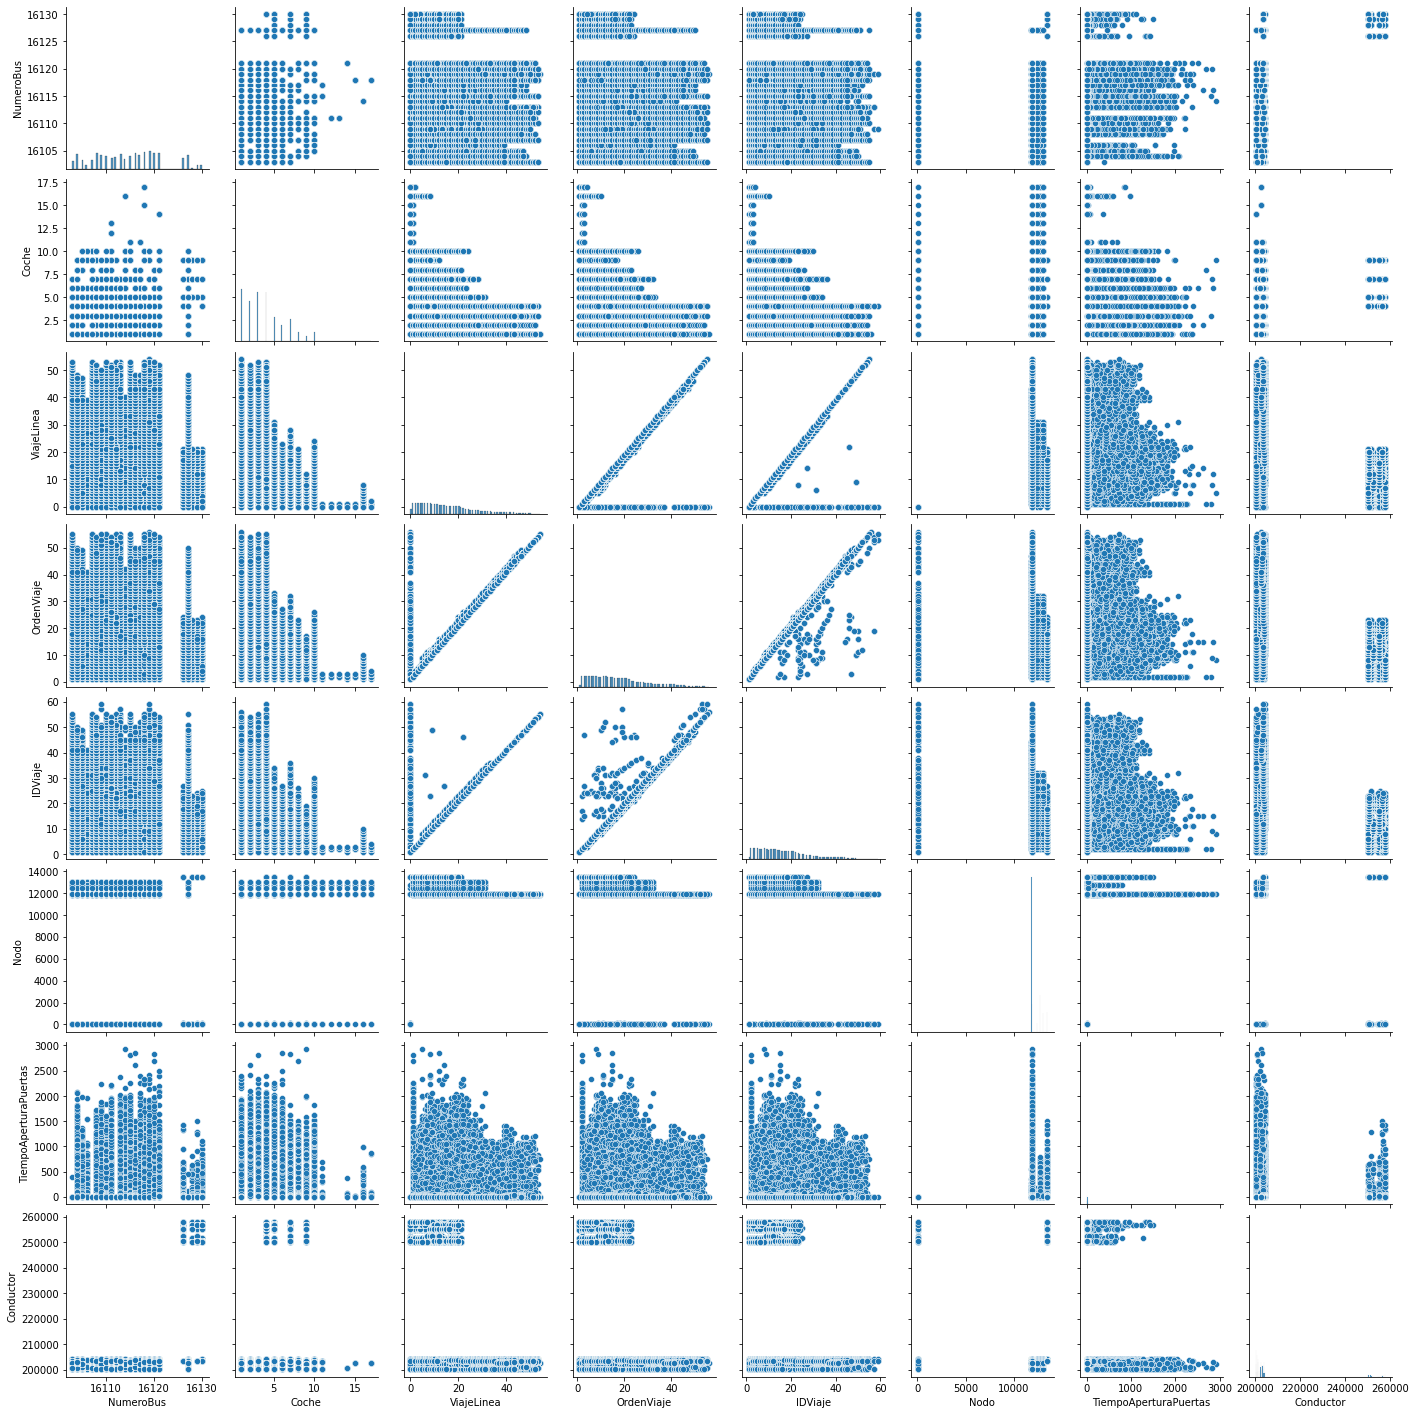

In [8]:
sns.pairplot(dates_al_suba)

##### Categorical

_Operador_

In [ ]:
dates_al_suba['Operador'].value_counts().plot.bar()

In [ ]:
dates_zn_suba['Operador'].value_counts().plot.bar()

In [ ]:
dates_al_ken['Operador'].value_counts().plot.bar()

In [ ]:
dates_zn_ken['Operador'].value_counts().plot.bar()

There is only one operator per zone

_NumeroBus_

In [ ]:
dates_al_suba['NumeroBus'].value_counts().plot.bar()

In [ ]:
dates_zn_suba['NumeroBus'].value_counts().plot.bar()
plt.xticks(rotation=90)

In [ ]:
dates_al_ken['NumeroBus'].value_counts().plot.bar()
plt.xticks(rotation=90)

In [ ]:
dates_zn_ken['NumeroBus'].value_counts().plot.bar()
plt.xticks(rotation=90)

**Analysis**

_Evento_

In [ ]:
dates_al_suba['Evento'].value_counts().plot.bar()
plt.xticks(rotation=90)

In [ ]:
dates_zn_suba['Evento'].value_counts().plot.bar()
plt.xticks(rotation=90)

In [ ]:
dates_al_ken['Evento'].value_counts().plot.bar()
plt.xticks(rotation=90)

In [ ]:
dates_zn_ken['Evento'].value_counts().plot.bar()
plt.xticks(rotation=90)

**Analysis**

_Tipo_

In [ ]:
dates_al_suba['Tipo'].value_counts().plot.bar()

In [ ]:
dates_zn_suba['Tipo'].value_counts().plot.bar()

In [ ]:
dates_al_ken['Tipo'].value_counts().plot.bar()

In [ ]:
dates_zn_ken['Tipo'].value_counts().plot.bar()

##### Time

##### Distribution per year

In [ ]:
dates_al_suba['Fecha'].value_counts().plot.line()
plt.xticks(rotation=90)

In [ ]:
dates_zn_suba['Fecha'].value_counts().plot.line()
plt.xticks(rotation=90)

In [ ]:
dates_al_ken['Fecha'].value_counts().plot.line()
plt.xticks(rotation=90)

In [ ]:
dates_zn_ken['Fecha'].value_counts().plot.line()
plt.xticks(rotation=90)

##### Distribution per hour

In [ ]:
dates_al_suba['Hora'].plot.hist(bins=24)

In [ ]:
dates_al_ken['Hora'].plot.hist(bins=24)

In [ ]:
dates_zn_suba['Hora'].plot.hist(bins=24)

In [ ]:
dates_zn_ken['Hora'].plot.hist(bins=24)

##### Distribution per week days

In [ ]:
dates_al_suba['Dia'].plot.hist(bins=20)

In [ ]:
dates_al_ken['Dia'].plot.hist(bins=20)

In [ ]:
dates_zn_suba['Dia'].plot.hist(bins=20)

In [ ]:
dates_zn_ken['Dia'].plot.hist(bins=20)

In [42]:
dates_zn_ken['Dia'].unique()

array([0], dtype=int64)

In [139]:
dates_al_suba[['HoraTeorica','HoraReferencia','Evento','Tipo']]

,HoraTeorica,HoraReferencia,Evento,Tipo
0,2021-07-10 04:01:00,2021-07-10 04:01:00,Inicio Viaje - Cocheras - Cocheras,Cochera
1,2021-07-10 04:19:00,2021-07-10 04:19:00,Fin Viaje,Parada
2,2021-07-10 04:19:00,2021-07-10 04:19:00,Inicio Viaje - Linea - Regulacion,Parada
3,2021-07-10 04:27:45,2021-07-10 04:27:45,NaN,Parada
4,2021-07-10 04:28:43,2021-07-10 04:28:43,NaN,Parada
...,...,...,...,...
5011,2021-07-10 23:16:58,2021-07-10 23:16:58,NaN,Parada
5012,2021-07-10 23:19:19,2021-07-10 23:19:19,NaN,Parada
5013,2021-07-10 23:20:50,2021-07-10 23:20:50,NaN,Parada
5014,2021-07-10 23:26:43,2021-07-10 23:26:43,NaN,Parada


Casi siempre que hay un cambio Fin Viaje se cambian OrdenViaje y IDViaje

In [153]:
dates_al_suba[((pd.isna(dates_al_suba['HoraSalida'])) | (pd.isna(dates_al_suba['HoraLlegada']))) & ~((dates_al_suba['Evento'].str.find('Inicio Viaje') != -1) | (dates_al_suba['Evento'].str.find('Fin Viaje') != -1))]['Evento'].unique()

array(['En Desvio ', 'Vacio/Limitacion '], dtype=object)

In [1]:
dates_al_sub.sort_values(by='HoraTeorica')

NameError: name 'dates_al_sub' is not defined

### Travels data

In [7]:
travels_al_suba = pd.read_csv('data/Masivo_capital_3_viajes_conductor/Informe Viajes Conductor_Alimentacion_102 Suba Oriental_202104.csv', sep=';')
travels_al_suba

,Fecha,operador,Conductor,ServicioCond,Servicio,IDViaje,Linea,Coche,Ruta,Bus,Vehiculo,HoraTeor,HoraRef,HoraReal
0,1/04/2021,[102] SO,200127,SO105016,SO0F40003,14,[153] 2-1 MI,1,1396,SO0120,16120,9:10:00,9:10:00,9:10:43
1,1/04/2021,[102] SO,200127,SO105016,SO0F40003,15,[153] 2-1 MI,1,1396,SO0120,16120,9:31:00,9:31:00,9:31:22
2,1/04/2021,[102] SO,200127,SO105016,SO0F40003,16,[153] 2-1 MI,1,1396,SO0120,16120,9:52:00,9:52:00,NaN
3,1/04/2021,[102] SO,200127,SO105016,SO0F40003,17,[153] 2-1 MI,1,1396,SO0120,16120,10:13:00,10:13:00,10:13:00
4,1/04/2021,[102] SO,200127,SO105016,SO0F40003,18,[153] 2-1 MI,1,1396,SO0120,16120,10:34:00,10:34:00,10:34:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12569,30/04/2021,[102] SO,203875,SO105014,CN12C0006,13,[148] 2-2 JA,4,417,SO0104,16104,9:12:15,9:12:15,9:12:42
12570,30/04/2021,[102] SO,203875,SO105014,CN12C0006,14,[148] 2-2 JA,4,417,SO0104,16104,9:38:15,9:38:15,9:39:21
12571,30/04/2021,[102] SO,204341,SO105035,SO10C0005,11,[152] 2-7 S.,4,1394,SO0109,16109,16:44:45,16:44:45,16:45:01
12572,30/04/2021,[102] SO,204341,SO105035,SO10C0005,12,[152] 2-7 S.,4,1394,SO0109,16109,17:34:45,17:34:45,17:34:44


In [8]:
travels_al_ken = pd.read_csv('data/Masivo_capital_3_viajes_conductor/Informe Viajes Conductor_Alimentacion_112 Kennedy_202104.csv', sep=';')
travels_al_ken

,Fecha,operador,Conductor,ServicioCond,Servicio,IDViaje,Linea,Coche,Ruta,Bus,Vehiculo,HoraTeor,HoraRef,HoraReal
0,1/04/2021,[112] KE,250060,KE107172,KE73E0043,27,[91] 8-2 K.,3,1389,KE0340,28340,16:20:15,16:20:15,NaN
1,1/04/2021,[112] KE,250060,KE107172,KE73E0043,28,[91] 8-2 K.,3,1389,KE0340,28340,17:05:15,17:05:15,17:03:57
2,1/04/2021,[112] KE,250060,KE107172,KE73E0043,29,[91] 8-2 K.,3,1389,KE0340,28340,17:47:15,17:47:15,17:47:04
3,1/04/2021,[112] KE,250060,KE107172,KE73E0043,30,[91] 8-2 K.,3,1389,KE0340,28340,18:22:15,18:22:15,18:20:54
4,1/04/2021,[112] KE,250060,KE107172,KE73E0043,31,[91] 8-2 K.,3,1389,KE0340,28340,18:57:15,18:57:15,18:55:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73176,30/04/2021,[112] KE,258011,KE106025,SO1090007,4,[347] 3-10,7,1824,SO0126,16126,6:18:00,6:18:00,6:19:25
73177,30/04/2021,[112] KE,258011,KE106025,SO1090007,5,[347] 3-10,7,1824,SO0126,16126,7:12:00,7:12:00,7:12:23
73178,30/04/2021,[112] KE,258011,KE106025,SO1090007,6,[347] 3-10,7,1824,SO0126,16126,8:05:30,8:05:30,8:05:30
73179,30/04/2021,[112] KE,258011,KE106025,SO1090007,7,[347] 3-10,7,1824,SO0126,16126,8:59:00,8:59:00,8:59:25


In [9]:
travels_zn_suba = pd.read_csv('data/Masivo_capital_3_viajes_conductor/Informe Viajes Conductor_Zonal_102 Suba Oriental_202104.csv', sep=';')
travels_zn_suba

,Fecha,operador,Conductor,ServicioCond,Servicio,IDViaje,Linea,Coche,Ruta,Bus,Vehiculo,HoraTeor,HoraRef,HoraReal
0,1/04/2021,[102] SO,200246,SO100055,SOD930002,5,[1291] CA117,2,5643,Z20-4117,204117,12:56:30,12:56:30,13:06:03
1,1/04/2021,[102] SO,200246,SO100054,SOD930012,2,[1291] CA117,12,5621,Z20-4087,204087,6:51:00,6:51:30,7:01:17
2,1/04/2021,[102] SO,200246,SO100054,SOD930012,3,[1291] CA117,12,5643,Z20-4087,204087,9:23:00,9:23:00,9:25:26
3,1/04/2021,[102] SO,200246,SO100054,SOD930012,4,[1291] CA117,12,5643,Z20-4087,204087,12:01:00,12:01:00,NaN
4,1/04/2021,[102] SO,200253,SO102065,SOD970012,6,[1113] BF404,12,4924,Z20-7142,207142,13:45:00,13:45:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48293,30/04/2021,[102] SO,204568,SO102033,SOD990002,16,[1157] 19-2,2,5131,Z22-4011,224011,12:58:00,12:58:00,13:00:13
48294,30/04/2021,[102] SO,204569,SO102030,SODA10003,2,[1169] T53,3,5187,Z20-4051,204051,5:13:00,5:13:30,5:14:49
48295,30/04/2021,[102] SO,204569,SO102030,SODA10003,3,[1169] T53,3,5187,Z20-4051,204051,5:52:00,5:52:30,5:53:03
48296,30/04/2021,[102] SO,204569,SO102030,SODA10003,4,[1169] T53,3,5187,Z20-4051,204051,6:44:00,6:44:00,6:47:09


In [10]:
travels_zn_ken = pd.read_csv('data/Masivo_capital_3_viajes_conductor/Informe Viajes Conductor_Zonal_112 Kennedy_202104.csv', sep=';')
travels_zn_ken

,Fecha,operador,Conductor,ServicioCond,Servicio,IDViaje,Linea,Coche,Ruta,Bus,Vehiculo,HoraTeor,HoraRef,HoraReal
0,1/04/2021,[112] KE,250007,KE100017,KEHB50007,2.0,[538] 576*,7.0,3595.0,Z25-4042,254042.0,5:54:00,5:54:00,5:54:01
1,1/04/2021,[112] KE,250007,KE100017,KEHB50007,3.0,[538] 576*,7.0,3596.0,Z25-4042,254042.0,7:26:00,7:26:00,7:26:41
2,1/04/2021,[112] KE,250007,KE100017,KEHB50007,4.0,[538] 576*,7.0,3595.0,Z25-4042,254042.0,8:58:45,8:58:45,8:59:21
3,1/04/2021,[112] KE,250007,KE100017,KEHB50007,5.0,[538] 576*,7.0,3596.0,Z25-4042,254042.0,10:42:00,10:42:00,10:42:39
4,1/04/2021,[112] KE,250070,KE100048,KEHIM0004,6.0,[605] P7.,4.0,4296.0,Z25-7086,257086.0,12:18:00,12:20:00,12:22:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120530,30/04/2021,[112] KE,258188,KE110120,SOCF60010,5.0,[527] 189.,10.0,4131.0,Z25-4700,254700.0,15:32:45,15:32:45,15:35:27
120531,30/04/2021,[112] KE,258188,KE110120,SOCF60010,6.0,[527] 189.,10.0,4130.0,Z25-4700,254700.0,18:02:00,18:02:00,18:01:37
120532,30/04/2021,[112] KE,258191,KE103134,KEHQK0001,12.0,[956] 738_MC,1.0,4009.0,Z25-4453,254453.0,14:30:30,14:31:00,14:39:34
120533,30/04/2021,[112] KE,258192,KE103405,KEHU30013,5.0,[475] 733_,13.0,2974.0,Z25-4010,254010.0,13:51:00,13:51:00,13:51:58


### Validations data

In [11]:
week = 13 
valid_suba = pd.read_csv('data/Masivo_capital_4_validaciones/Reporte de Validaciones_Zonal_102 Suba Oriental_202104_Semana '+str(week)+'.csv',sep=';')
for i in range(1,5):
    valid_suba = pd.concat([valid_suba, pd.read_csv('data/Masivo_capital_4_validaciones/Reporte de Validaciones_Zonal_102 Suba Oriental_202104_Semana '+str(week+i)+'.csv',sep=';')])
valid_suba

,Fecha Clearing,D�a Trx,Hora Trx,Operador,Ruta Modificada,Linea SAE,Parada,Tipo Vehiculo,Vehiculo,Tipo de Viaje,Linea
0,2021-03-29 00:00:00.0,29/03/2021,3:59:22,102,3811,920,(3156) 212A12CEEE|212A12_Br. Puerta al Llano,(02) Urbano,204154,Transbordo,(920) TC30
1,2021-03-29 00:00:00.0,29/03/2021,3:59:26,102,3811,920,(3156) 212A12CEEE|212A12_Br. Puerta al Llano,(02) Urbano,204154,Transbordo,(920) TC30
2,2021-03-29 00:00:00.0,29/03/2021,3:59:29,102,3811,920,(3156) 212A12CEEE|212A12_Br. Puerta al Llano,(02) Urbano,204154,Transbordo,(920) TC30
3,2021-03-29 00:00:00.0,29/03/2021,3:59:32,102,3811,920,(3156) 212A12CEEE|212A12_Br. Puerta al Llano,(02) Urbano,204154,Transbordo,(920) TC30
4,2021-03-29 00:00:00.0,29/03/2021,3:59:36,102,3811,920,(3156) 212A12CEEE|212A12_Br. Puerta al Llano,(02) Urbano,204154,Transbordo,(920) TC30
...,...,...,...,...,...,...,...,...,...,...,...
536745,2021-05-02 00:00:00.0,26/04/2021,21:47:35,112,3142,779,(19179) 079A12_MC|079A12_Br. San Jos?ur,(02) Urbano,254162,Viaje Inicial,(779) T30A
536746,2021-05-02 00:00:00.0,27/04/2021,22:05:01,112,4009,956,(19171) 021A10_MC|021A10_Sena,(02) Urbano,254162,Transbordo,(956) 738
536747,2021-05-02 00:00:00.0,27/04/2021,22:05:04,112,4009,956,(19171) 021A10_MC|021A10_Sena,(02) Urbano,254162,Transbordo,(956) 738
536748,2021-05-02 00:00:00.0,27/04/2021,22:08:05,112,4009,956,(47067) 102B11_MC|102B11,(02) Urbano,254162,Viaje Inicial,(956) 738


In [12]:
valid_ken = pd.read_csv('data/Masivo_capital_4_validaciones/Reporte de Validaciones_Zonal_112 Kennedy_202104_Semana '+str(week)+'.csv',sep=';')
for i in range(1,5):
    valid_ken = pd.concat([valid_ken, pd.read_csv('data/Masivo_capital_4_validaciones/Reporte de Validaciones_Zonal_112 Kennedy_202104_Semana '+str(week+i)+'.csv',sep=';')])
valid_ken

,Fecha Clearing,D�a Trx,Hora Trx,Operador,Ruta Modificada,Linea SAE,Parada,Tipo Vehiculo,Vehiculo,Tipo de Viaje,Linea
0,2021-03-29 00:00:00.0,30/03/2021,0:00:51,112,4873,1063,(57342) 233C00_TM|233C00_Tecnoparque SENA,(02) Urbano,257372,Transbordo,(1063) GA507
1,2021-03-29 00:00:00.0,30/03/2021,0:02:18,112,5494,1055,(54040) 185B08_TM|185B08_Br. Ciudad Kennedy Or...,(02) Urbano,257330,Viaje Inicial,(1055) GL508
2,2021-03-29 00:00:00.0,30/03/2021,0:04:31,112,1445,487,(2102) 154A06_EE|154A06,(02) Urbano,257049,Transbordo,(487) 265
3,2021-03-29 00:00:00.0,30/03/2021,0:10:38,112,4875,1101,(51156) 046A09_TM|046A09_Hsp. Pablo VI Bosa,(02) Urbano,257257,Transbordo,(1101) 579
4,2021-03-29 00:00:00.0,30/03/2021,2:59:43,112,4012,958,(43146) 629A08_MC|629A08,(02) Urbano,254240,Transbordo,(958) R_7
...,...,...,...,...,...,...,...,...,...,...,...
208517,2021-05-02 00:00:00.0,2/05/2021,21:08:06,102,4992,1138,(56392) 084A01_TM|084A01_Urb. Contador Norte,(02) Urbano,207051,Viaje Inicial,(1138) T11
208518,2021-05-02 00:00:00.0,2/05/2021,21:11:17,102,4992,1138,(52091) 121A11_TM|121A11_CAI Tunal,(02) Urbano,207039,Transbordo,(1138) T11
208519,2021-05-02 00:00:00.0,2/05/2021,21:12:51,102,4992,1138,(51928) 060A11_TM|060A11_IED Rafael Uribe,(02) Urbano,207039,Transbordo,(1138) T11
208520,2021-05-02 00:00:00.0,2/05/2021,21:12:57,102,4992,1138,(51928) 060A11_TM|060A11_IED Rafael Uribe,(02) Urbano,207039,Viaje Inicial,(1138) T11


### Operator programming data

In [13]:
operator_data = pd.read_csv( 'data/Masivo_capital_5_programacion/Reporte Progrmacion de Operadores_202104.csv',sep=';')
operator_data

c:\users\germa\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (7,15,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Fecha,Compa��a,Asignaci�n,C�digo de conductor,Conductor,Amplitud del servicio,Tiempo de producci�n,Distancia de producci�n (m),Parte de trabajo,Tipo de tarea,...,Unnamed: 17,Servicio Base,Tipo de veh�culo,L�nea,Unnamed: 21,Ruta,Unnamed: 23,Veh�culo,Viajes,Trayecto
0,1/04/2021,Masivo Capital Alimentadores KE,DESC,250003,DEIVY STEAK ZULUAGA QUINTERO,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/04/2021,Masivo Capital Alimentadores KE,DESC,250047,ALVARO ENRIQUE HERRERA HERRERA,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/04/2021,Masivo Capital Alimentadores KE,DESC,250056,FLEDERID SANCHEZ MORALES,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/04/2021,Masivo Capital Alimentadores KE,DISPOPM_Brasil,250060,JOSE CAMPO ELIAS CUESTA MORALES,10:00:00,8:00:00,NaN,1,Disponible Conducci�n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/04/2021,Masivo Capital Alimentadores KE,KE107171,250062,JUAN CARLOS MELO MORALES,10:35:00,9:35:00,94214,1,Relevo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735137,30/04/2021,MC_Usme_Alim,KE106025,258011,CARLOS ANDRES RODRIGUEZ PINILLA,7:10:00,7:10:00,127052.0,1,3-10_USME_CENTRO_BRT,...,NaN,NaN,PADRON,347.0,NaN,1824,NaN,7.0,6.0,1391.0
735138,30/04/2021,MC_Usme_Alim,KE106025,258011,CARLOS ANDRES RODRIGUEZ PINILLA,7:10:00,7:10:00,127052.0,1,STANDBY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735139,30/04/2021,MC_Usme_Alim,KE106025,258011,CARLOS ANDRES RODRIGUEZ PINILLA,7:10:00,7:10:00,127052.0,1,3-10_USME_CENTRO_BRT,...,NaN,NaN,PADRON,347.0,NaN,1824,NaN,7.0,7.0,1391.0
735140,30/04/2021,MC_Usme_Alim,KE106025,258011,CARLOS ANDRES RODRIGUEZ PINILLA,7:10:00,7:10:00,127052.0,1,3-10_USME_CENTRO_BRT,...,NaN,NaN,PADRON,347.0,NaN,1824,NaN,7.0,8.0,1391.0


### Stops distance matrix

In [14]:
distance_data = pd.read_csv( 'data/Masivo_capital_6_Matriz_distancia/Reporte de Matriz Distancias - Paradas SAE_202104.csv',sep=';')
distance_data

,StrLinea,ConfigAct,ConfigFecha,Sublinea,StrRuta,TipoNodo,Nodo,Nombre,Posicion,StrTipoServicio,Linea,ID Ruta
0,[121] DUAL80,8,8,294,[400] M80-L80 Normal,1,1970,PORTAL 20 DE JULIO T7,0,[5] PADRON,121,400
1,[121] DUAL80,8,8,294,[400] M80-L80 Normal,1,1940,Country Sur B - 4 � 6,1129,[5] PADRON,121,400
2,[121] DUAL80,8,8,294,[400] M80-L80 Normal,1,1977,Av. 1� de Mayo B - 4 � 6,1926,[5] PADRON,121,400
3,[121] DUAL80,8,8,294,[400] M80-L80 Normal,1,1939,Ciudad Jard�n-UAN B - 4 � 6,2554,[5] PADRON,121,400
4,[121] DUAL80,8,8,294,[400] M80-L80 Normal,1,1960,Policarpa A - 3 � 6,3151,[5] PADRON,121,400
...,...,...,...,...,...,...,...,...,...,...,...,...
419555,[1195] HK707,1,2,3906,[5314] H707_202116_Vuelta_NS_V1,1,53407,076A12_Br. Puerta al Llano Rural,31436,[0] URBANO,1195,5314
419556,[1195] HK707,1,2,3906,[5314] H707_202116_Vuelta_NS_V1,1,53365,055A12_Br. Puerta al Llano Rural,32043,[0] URBANO,1195,5314
419557,[1195] HK707,1,2,3906,[5314] H707_202116_Vuelta_NS_V1,1,53364,054A12_Br. La Esperanza de Usme,33096,[0] URBANO,1195,5314
419558,[1195] HK707,1,2,3906,[5314] H707_202116_Vuelta_NS_V1,1,53406,075A12_Br. Puerta al Llano Rural,33691,[0] URBANO,1195,5314


## External data

In [9]:
datos = pd.read_csv('paradas-rutas-zonales-sitp.csv', sep=';')
datos.columns = ['LINEA', 'RUTA', 'NODO', 'NOMBRE', 'POSICION', 'TIPO_SERVICIO']

In [19]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31264 entries, 0 to 31263
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LINEA          31264 non-null  object
 1   RUTA           31264 non-null  object
 2   NODO           31264 non-null  int64 
 3   NOMBRE         31264 non-null  object
 4   POSICION       31264 non-null  int64 
 5   TIPO_SERVICIO  31264 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.4+ MB


In [53]:
datos_linea = datos.copy()
datos_linea.isna().any()

LINEA            False
RUTA             False
NODO             False
NOMBRE           False
POSICION         False
TIPO_SERVICIO    False
dtype: bool

## Cleaning

In [54]:
datos_linea['TIPO_SERVICIO'].unique()

array(['[0] URBANO', '[2] COMPLEMENTARIO', '[3] ESPECIAL'], dtype=object)

In [60]:
datos_linea['LINEA'] = datos_linea['LINEA'].map(lambda x: re.findall('\[.+\] (\S+)' ,x)[0])
datos_linea['RUTA'] = datos_linea['RUTA'].map(lambda x: re.findall('\[.+\] (\S+)' ,x)[0])
datos_linea['TIPO_SERVICIO'] = datos_linea['TIPO_SERVICIO'].map(lambda x: re.findall('\[.+\] (\S+)' ,x)[0])

In [61]:
datos_linea.sort_values(by='POSICION')

,LINEA,RUTA,NODO,NOMBRE,POSICION,TIPO_SERVICIO
0,544B,544B_HABITUAL_29.07.2019,48726,338B02_CE.,0,URBANO
23431,N17,N17_DESINC,50419,405A10_SU,0,URBANO
23405,N17,N17_INC,42168,048A11SU,0,URBANO
23396,7-1,7-1,50047,7-1 40Sur_SU,0,URBANO
23387,7-1,7-1,50047,7-1 40Sur_SU,0,URBANO
...,...,...,...,...,...,...
4226,191,191_HABITUAL_090320,50033,250A09_CE,80176,URBANO
4227,191,191_HABITUAL_090320,35253,248A09_CE,80462,URBANO
4228,191,191_HABITUAL_090320,50991,253A09_Br. Ciudadela El Recreo I,80630,URBANO
4229,191,191_HABITUAL_090320,35252,247A09_CE,80792,URBANO


In [67]:
datos_matriz = pd.read_csv('paradas-rutas-troncales-y-alimentadoras-transmilenio__.csv', sep=';')

In [68]:
datos_matriz

,Linea,Nombre_Linea,Ruta,Nombre_Ruta,Destino,Id_Parada,Posicion,Nombre_Parada,Tipo_Servicio,Estaci�n
0,1,CH15,1878,C15,Portal Suba,1808,0,Portal Tunal T6,[1] TRONCAL,Portal Tunal
1,1,CH15,1878,C15,Portal Suba,1805,1293,Parque A - 4 � 6,[1] TRONCAL,Parque
2,1,CH15,1878,C15,Portal Suba,1782,3454,Calle 40 S. A - 4 � 6,[1] TRONCAL,Calle 40 Sur
3,1,CH15,1878,C15,Portal Suba,1800,4918,Olaya A - 3 � 6,[1] TRONCAL,Olaya
4,1,CH15,1878,C15,Portal Suba,1403,8415,Tercer Milenio B - 4 � 6,[1] TRONCAL,Tercer Milenio
...,...,...,...,...,...,...,...,...,...,...
3205,253,MH83,1747,M83,Museo Nacional,1961,10598,Policarpa B - 4 � 6,[5] PADRON,Policarpa
3206,253,MH83,1747,M83,Museo Nacional,1926,11450,Bicentenario A - 3 � 6,[5] PADRON,Bicentenario
3207,253,MH83,1747,M83,Museo Nacional,1992,12583,San Victorino C - 4 � 6,[5] PADRON,San Victorino
3208,253,MH83,1747,M83,Museo Nacional,12923,13819,San Diego B - 8,[5] PADRON,San Diego
